In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

- ## Causality (인과 관계)

---

- ## RCT (무작위 대조 실험)
    - ### BTA를 요통의 치료제로 사용하는 효과를 조사
        - #### 이중 블라인드 방식
            - #### 의사 환자 모두 환자가 어느 그룹에 속하는지 알 수 없도록 함
         
<br>

In [2]:
bta = Table.read_table("./csv4/bta.csv")
bta.show(3)

Group,Result
Control,1
Control,1
Control,0


<br>

- #### 각 그룹의 회복한 환자수 및 비율

In [6]:
bta.group("Group", np.sum)

Group,Result sum
Control,2
Treatment,9


In [5]:
bta.group("Group", np.average)

Group,Result average
Control,0.125
Treatment,0.6


<br>

- ### 치료군, 대조군은 무작위로 배정된 것이기 때문에 BTA에 의해 회복된 것이 아닐 수 있음
    - #### 대조군 2명 약물 없이 치유되었으므로 치료군 중 일부도 이와 같은 경우일 수 있음

<br>

- ### Randomization
    - ### 약물이 효과가 있을 경우 모든 환자가 각 그룹에 속했을 때의 분포가 달라야함
        - #### 귀무가설: 두 분포가 동일함
        - #### 대립가설: 두 분포가 다름
    - ### 무작위 순열을 이용하여 시뮬레이션 가능

<br>

- #### 관측 검정 통계량
    - #### 귀무가설일 경우, 이 값과 무작위 순열의 결과가 같아야 함

In [8]:
observed_proportions = bta.group("Group", np.average).column(1)
observed_distance = abs(observed_proportions.item(0) - observed_proportions.item(1))
observed_distance

0.475

<br>

- #### 두 그룹의 거리를 계산하는 함수

In [9]:
def distance(table, group_label):
    reduced = table.select("Result", group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(0) - proportions.item(1))

distance(bta, "Group")

0.475

<br>

- #### 무작위 순열 시뮬레이션

In [13]:
def one_simulated_distance():
    shuffled_group = bta.sample(with_replacement=False).column(0)
    shuffled_table = bta.with_column("Shuffled Group", shuffled_group)
    return distance(shuffled_table, "Shuffled Group")

one_simulated_distance()

0.041666666666666685

In [14]:
distances = make_array()
for _ in range(20000):
    distances = np.append(distances, one_simulated_distance())
distances

array([ 0.0875    ,  0.21666667,  0.21666667, ...,  0.17083333,
        0.0875    ,  0.04166667])

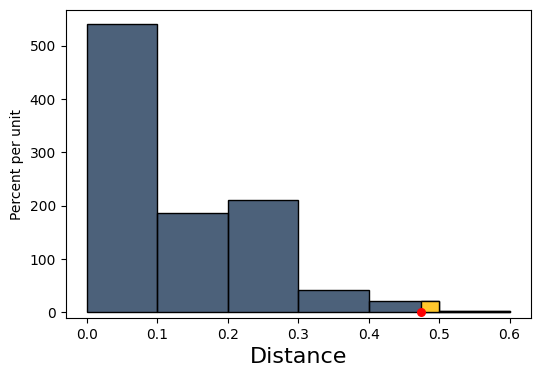

In [19]:
#hist의 left_end paramter: 특정 값 이후 색상 다르게 표시

Table().with_column("Distance", distances).hist(bins=np.arange(0, 0.7, 0.1), left_end=observed_distance)
plt.ylim(-0.1)
plt.scatter(observed_distance, 0, color="red", s=30)

- ### 경험적 P-Value
    - #### 대립가설을 선호

In [20]:
np.count_nonzero(distances >= observed_distance) / 20000

0.00975